In [1]:
# Install necessary packages
!pip install torch torchvision tqdm
!pip install scikit-image tqdm
!pip install pandas
!pip install torch-summary
!pip install tqdm
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-pac

In [2]:
# Imports
import torch
import torch.nn as nn  # All neural network modules, nn.Linear, nn.Conv2d, BatchNorm, Loss functions
import torch.optim as optim  # For all Optimization algorithms, SGD, Adam, etc.
import torchvision.transforms as transforms  # Transformations we can perform on our dataset
import torchvision
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
from skimage import io
from skimage.transform import rescale, resize, downscale_local_mean
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from torchvision.models import resnet50
from torch.utils.data import (
    Dataset,
    DataLoader,
)  # Gives easier dataset management and creates mini batches
from torchvision.datasets import ImageFolder
from torchvision import transforms
import matplotlib.pyplot as plt

In [3]:
print("CUDA available: ", torch.cuda.is_available())
print("CUDA device count: ", torch.cuda.device_count())
if torch.cuda.is_available():
    print("CUDA device name: ", torch.cuda.get_device_name(0))

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device: ", device)

CUDA available:  True
CUDA device count:  1
CUDA device name:  NVIDIA A100-PCIE-40GB
Device:  cuda


In [4]:
# Define transforms
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [12]:
def is_valid_file(path):
    # Only accept files with valid extensions and ignore .ipynb_checkpoints directory
    valid_extensions = {'.jpg', '.jpeg', '.png', '.ppm', '.bmp', '.pgm', '.tif', '.tiff', '.webp'}
    return path.endswith(tuple(valid_extensions))

# Directories for datasets
train_dir = '/home/jupyter-thaqif/Qif/realclassification/PlantDataset-Copy1/train'
val_dir = '/home/jupyter-thaqif/Qif/realclassification/PlantDataset-Copy1/validation'

# Load datasets using the specified method
train_dataset = ImageFolder(root=train_dir, transform=data_transforms['train'], is_valid_file=is_valid_file)
val_dataset = ImageFolder(root=val_dir, transform=data_transforms['val'], is_valid_file=is_valid_file)

train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=32, shuffle=False)

In [13]:
# Initialize ResNet50 model
model = resnet50(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 3)  # Adjust the output layer to match the number of classes

model = model.to(device)

In [14]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [15]:
# Training the model with a scheduler
num_epochs = 25

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * inputs.size(0)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
    
    # Step the scheduler
    scheduler.step()

    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_acc = 100. * correct / total

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%")

Epoch [1/25], Loss: 1.0192, Accuracy: 60.53%
Epoch [2/25], Loss: 0.7105, Accuracy: 74.21%
Epoch [3/25], Loss: 0.5295, Accuracy: 78.42%
Epoch [4/25], Loss: 0.6019, Accuracy: 80.53%
Epoch [5/25], Loss: 0.5460, Accuracy: 79.47%
Epoch [6/25], Loss: 0.5520, Accuracy: 82.11%
Epoch [7/25], Loss: 0.4471, Accuracy: 81.05%
Epoch [8/25], Loss: 0.3331, Accuracy: 86.32%
Epoch [9/25], Loss: 0.3227, Accuracy: 90.00%
Epoch [10/25], Loss: 0.3193, Accuracy: 85.26%
Epoch [11/25], Loss: 0.2960, Accuracy: 88.95%
Epoch [12/25], Loss: 0.2530, Accuracy: 91.05%
Epoch [13/25], Loss: 0.1904, Accuracy: 95.79%
Epoch [14/25], Loss: 0.1762, Accuracy: 96.84%
Epoch [15/25], Loss: 0.1689, Accuracy: 92.63%
Epoch [16/25], Loss: 0.1611, Accuracy: 96.32%
Epoch [17/25], Loss: 0.1838, Accuracy: 93.16%
Epoch [18/25], Loss: 0.1687, Accuracy: 93.16%
Epoch [19/25], Loss: 0.1470, Accuracy: 94.74%
Epoch [20/25], Loss: 0.1573, Accuracy: 94.21%
Epoch [21/25], Loss: 0.1654, Accuracy: 93.16%
Epoch [22/25], Loss: 0.1344, Accuracy: 96.3

In [16]:
# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

val_acc = 100. * correct / total
print(f"Validation Accuracy: {val_acc:.2f}%")

Validation Accuracy: 96.59%


In [17]:
# Save the trained model
model_save_path = 'resnet50_plant_classification.pth'
torch.save(model.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")

Model saved to resnet50_plant_classification.pth


In [18]:
# Define class labels
class_names = ['banana_tree', 'curry_tree', 'papaya_tree']

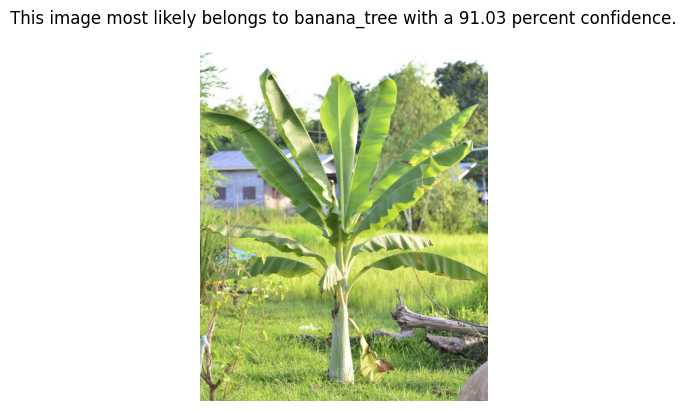

This image most likely belongs to banana_tree with a 91.03 percent confidence.
Probabilities: {'banana_tree': 0.9103165, 'curry_tree': 0.0512262, 'papaya_tree': 0.038457178}


In [20]:
# Prediction function
import torch.nn.functional as F
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

def predict_image(model, image_path, class_names):
    """
    Predict the class of an image using a trained model and display the image.
    
    Args:
    - model (torch.nn.Module): Trained model for prediction.
    - image_path (str): Path to the image file.
    - class_names (list): List of class names.
    
    Returns:
    - str: Formatted prediction result.
    - dict: Probabilities for each class.
    """
    # Transform to match the training preprocessing
    transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    
    # Load and preprocess the image
    image = Image.open(image_path).convert('RGB')
    image_tensor = transform(image)
    image_tensor = image_tensor.unsqueeze(0)  # Add batch dimension

    # Move the image to the device
    image_tensor = image_tensor.to(device)

    # Make prediction
    model.eval()
    with torch.no_grad():
        output = model(image_tensor)
        probabilities = F.softmax(output, dim=1).cpu().numpy().squeeze()
        predicted_idx = probabilities.argmax()
    
    predicted_class = class_names[predicted_idx]
    confidence = probabilities[predicted_idx] * 100
    result = f"This image most likely belongs to {predicted_class} with a {confidence:.2f} percent confidence."
    
    # Display the image
    plt.imshow(image)
    plt.title(result)
    plt.axis('off')
    plt.show()
    
    return result, dict(zip(class_names, probabilities))

# Example usage:
image_path = '/home/jupyter-thaqif/Qif/realclassification/testpisangtree.jpg'
result, probabilities = predict_image(model, image_path, class_names)
print(result)
print(f"Probabilities: {probabilities}")